In [62]:
import os
import rasterio
import matplotlib.pyplot as plt
import streamlit as st


In [63]:

# Path to the data folder
DATA_FOLDER = "Datasets_Hackathon"

# Example file name (change to match your actual .tif file)
tif_filename = "2010LCT.tif"

# Create the full path
tif_path = os.path.join(DATA_FOLDER,"Modis_Land_Cover_Data", tif_filename)

In [64]:
import numpy as np

with rasterio.open(tif_path) as src:
    data = src.read(1)
unique_vals = np.unique(data)
print(unique_vals)


[-128    7   10   12   13   16]


In [65]:
import os
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Define your discrete colormap (update class_values and class_colors based on your data)
class_values = [0, 1, 2, 3, 4, 5]  # Update these to reflect your dataset's actual classes
class_colors = ["#FFFFFF", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"]
cmap = colors.ListedColormap(class_colors)
norm = colors.BoundaryNorm(class_values, cmap.N)

# Get list of all GeoTIFF files (assuming they are .tif files) in the folder
data_folder = "Datasets_Hackaton/Modis_Land_Cover_Data"
tif_files = sorted(glob.glob(os.path.join(data_folder, "*.tif")))

# Set up a grid for subplots; adjust rows and columns based on the number of files
n_files = len(tif_files)
cols = 4  # for example, 4 columns
rows = n_files // cols + int(n_files % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()  # Make it easier to iterate even if it's a 2D array

for i, tif_path in enumerate(tif_files):
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        # If there's a nodata value defined, mask those values
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)

    ax = axes[i]
    im = ax.imshow(data, cmap=cmap, norm=norm)
    ax.set_title(os.path.basename(tif_path))
    ax.axis('off')

# Hide any extra subplots if the grid is larger than the number of files
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Add a single colorbar for all subplots
fig.colorbar(im, ax=axes.tolist(), orientation='vertical', fraction=0.02, pad=0.01)

plt.tight_layout()
plt.show()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1600x0 with 0 Axes>

In [ ]:
import glob
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# 1. Define a discrete colormap (example) for your land cover classes
#    Adjust the class_values and class_colors to match your actual dataset
class_values = [0, 1, 2, 3, 4, 5]  # Example class codes
class_colors = ["#FFFFFF", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"]
cmap = colors.ListedColormap(class_colors)
norm = colors.BoundaryNorm(class_values, cmap.N)

# 2. Collect all GeoTIFFs (2010 to 2023) in sorted order
tif_files = sorted(glob.glob("Datasets_Hackathon/Modis_Land_Cover_Data/*.tif"))
print("Found files:", tif_files)

# 3. Set up a grid of subplots
n_files = len(tif_files)
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(16, 16))

for i, tif_path in enumerate(tif_files):
    row = i // cols
    col = i % cols
    ax = axes[row, col]

    # Open and read the raster
    with rasterio.open(tif_path) as src:
        data = src.read(1)

    # Plot the raster using the discrete colormap
    im = ax.imshow(data, cmap=cmap, norm=norm)
    ax.set_title(os.path.basename(tif_path))
    ax.axis('off')

# If you have fewer than rows*cols images, hide extra subplots
for j in range(i + 1, rows * cols):
    row = j // cols
    col = j % cols
    axes[row, col].axis('off')

# Optionally add a single colorbar for all subplots
fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.02, pad=0.01)

plt.show()


In [ ]:
import numpy as np
with rasterio.open("Datasets_Hackathon/Modis_Land_Cover_Data/2011LCT.tif") as src:
    data_2011 = src.read(1)
print(np.unique(data_2011))


In [ ]:
# Dictionary: class_code -> descriptive label
class_labels = {
    0:  "Water bodies",
    1:  "Evergreen Needleleaf Forests",
    2:  "Evergreen Broadleaf Forests",
    3:  "Deciduous Needleleaf Forests",
    4:  "Deciduous Broadleaf Forests",
    5:  "Mixed Forests",
    6:  "Closed Shrublands",
    7:  "Open Shrublands",
    8:  "Woody Savannas",
    9:  "Savannas",
    10: "Grasslands",
    11: "Permanent Wetlands",
    12: "Croplands",
    13: "Urban and Built-up",
    14: "Cropland/Natural Veg. Mosaics",
    15: "Snow and Ice",            # or Non-Vegetated Lands (depends on your dataset)
    16: "Barren or Sparsely Vegetated",
    17: "Unclassified",
    254: "Unclassified",
    255: "Unclassified"  # Sometimes 254/255 are used for fill/nodata
}

# Dictionary: class_code -> hex color (feel free to customize!)
# This is just an example palette with distinct colors.
class_colors = {
    0:  "#1f78b4",  # Water (blue-ish)
    1:  "#33a02c",  # Evergreen Needleleaf
    2:  "#b2df8a",  # Evergreen Broadleaf
    3:  "#e31a1c",  # Deciduous Needleleaf
    4:  "#fb9a99",  # Deciduous Broadleaf
    5:  "#ff7f00",  # Mixed Forests
    6:  "#cab2d6",  # Closed Shrublands
    7:  "#6a3d9a",  # Open Shrublands
    8:  "#ffff99",  # Woody Savannas
    9:  "#b15928",  # Savannas
    10: "#fdbf6f",  # Grasslands
    11: "#a6cee3",  # Permanent Wetlands
    12: "#8dd3c7",  # Croplands
    13: "#999999",  # Urban and Built-up
    14: "#bebada",  # Cropland/Nat Veg. Mosaics
    15: "#d9d9d9",  # Snow and Ice / Non-vegetated
    16: "#cccccc",  # Barren
    17: "#f2f2f2",  # Unclassified
    254: "#f2f2f2",
    255: "#f2f2f2"
}


In [ ]:
import glob
import os
import numpy as np
import rasterio

data_folder = "Datasets_Hackathon/Modis_Land_Cover_Data"
tif_files = sorted(glob.glob(os.path.join(data_folder, "*.tif")))

for tif_path in tif_files:
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)

    used_codes = np.unique(data.compressed()) if np.ma.is_masked(data) else np.unique(data)
    used_codes = sorted(used_codes.tolist())
    print(f"Used codes in {os.path.basename(tif_path)}:", used_codes)


In [ ]:
import matplotlib.colors as mcolors

# Assume you already have a dict of code -> hex color, e.g.:
# class_colors = {0: "#1f78b4", 1: "#33a02c", 2: "#b2df8a", ...}

colors_for_used = [class_colors[code] for code in used_codes]
used_cmap = mcolors.ListedColormap(colors_for_used)

# BoundaryNorm expects one more boundary than the number of classes
used_norm = mcolors.BoundaryNorm(used_codes + [used_codes[-1] + 1], len(used_codes))


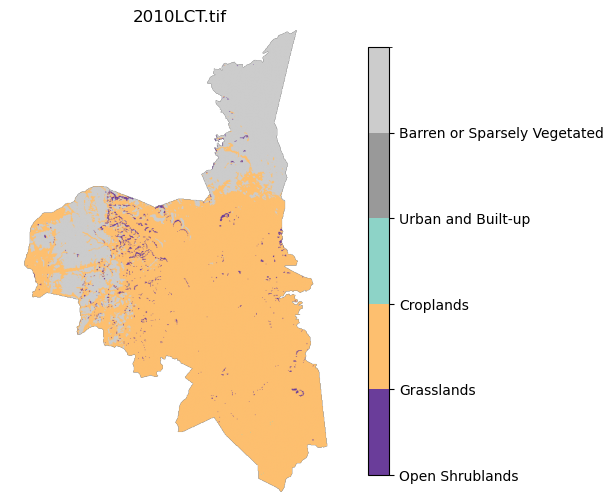

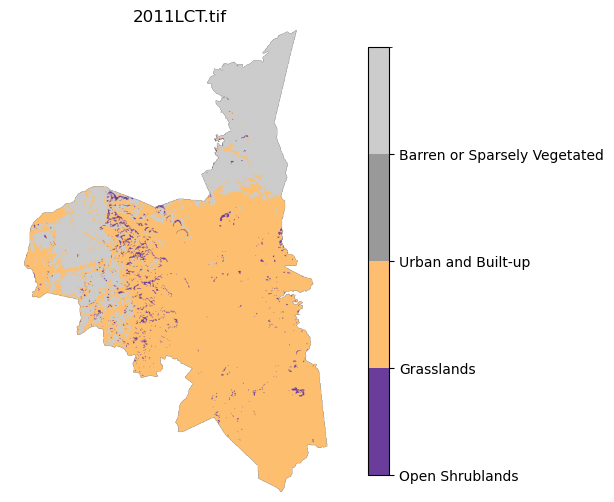

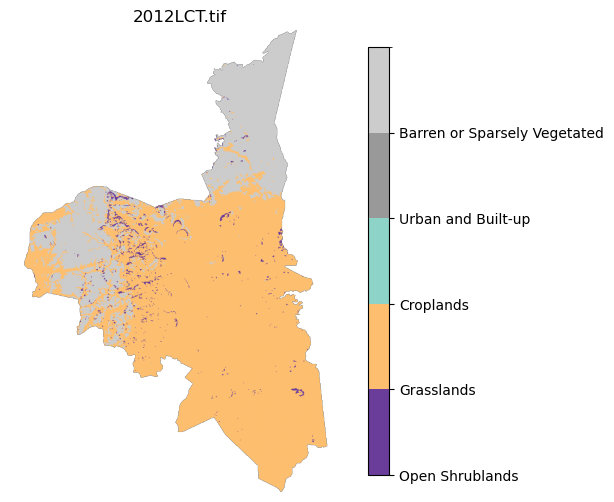

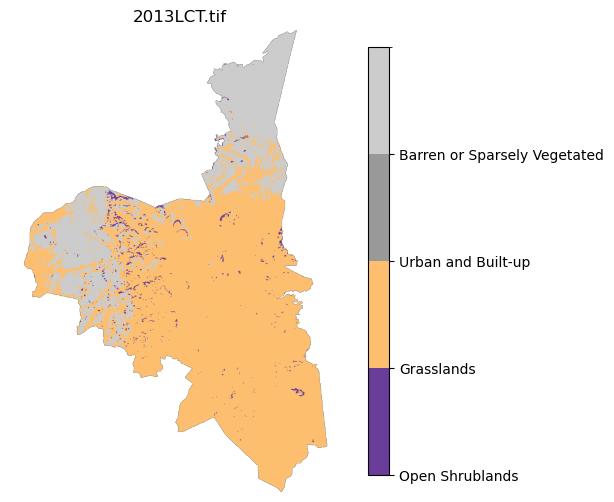

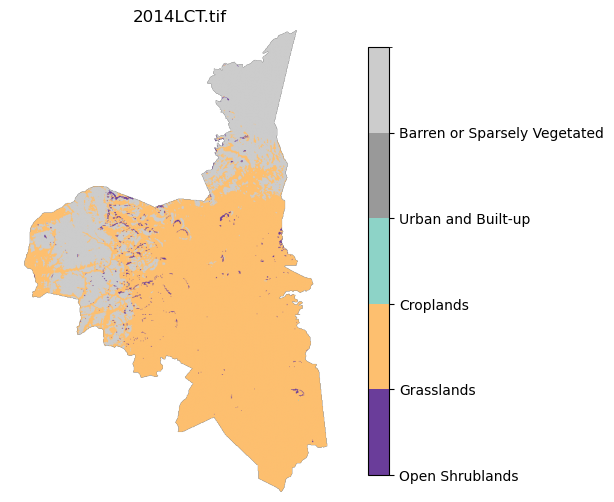

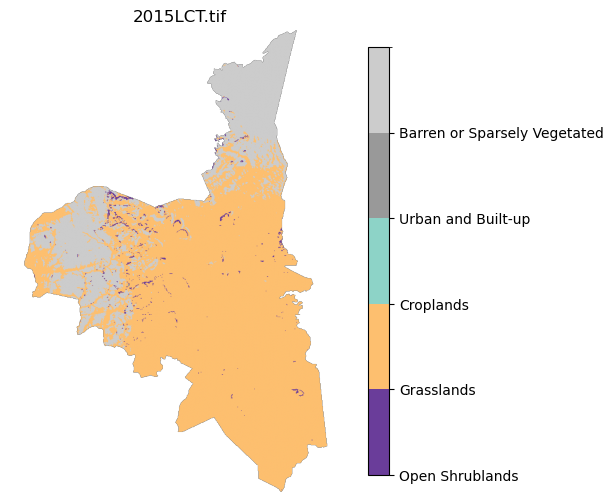

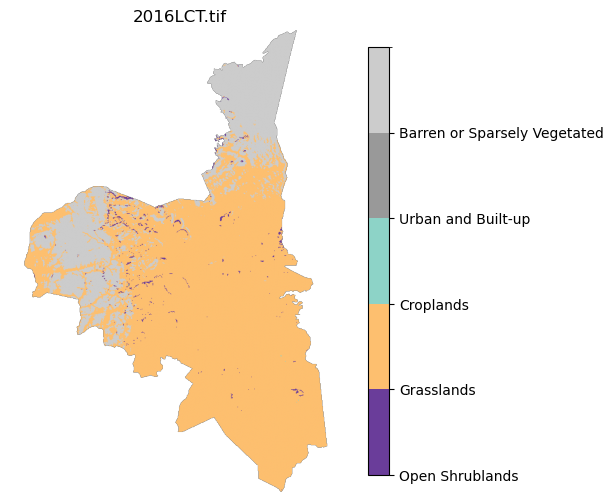

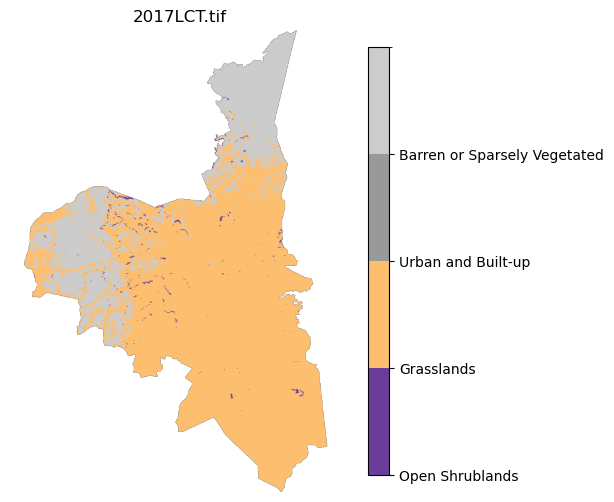

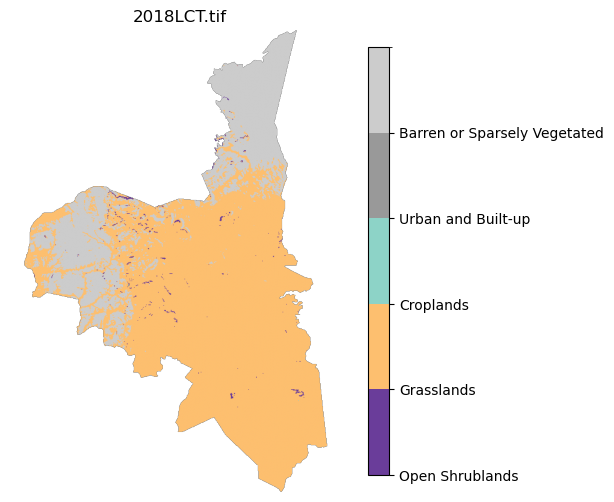

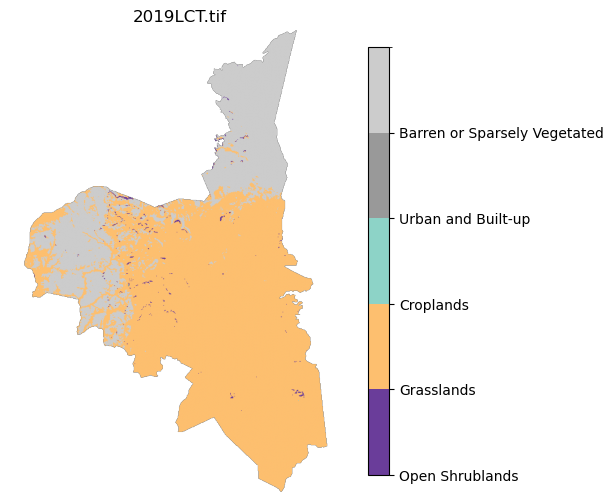

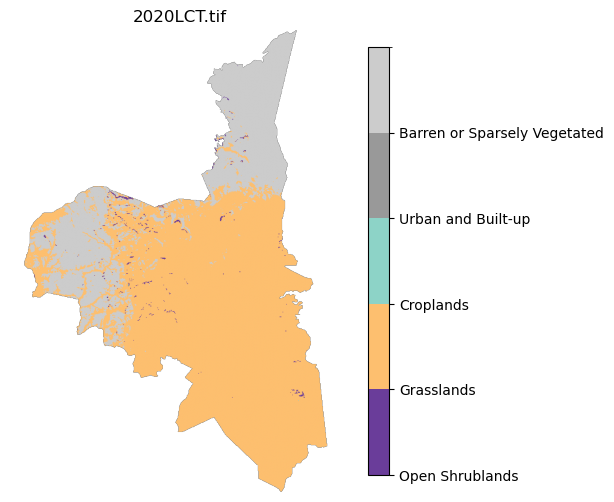

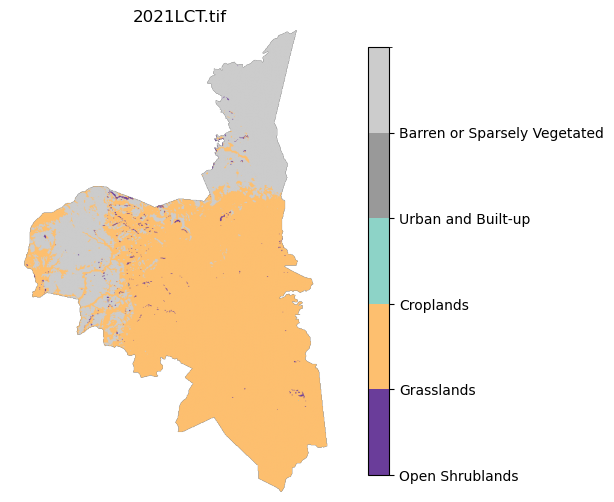

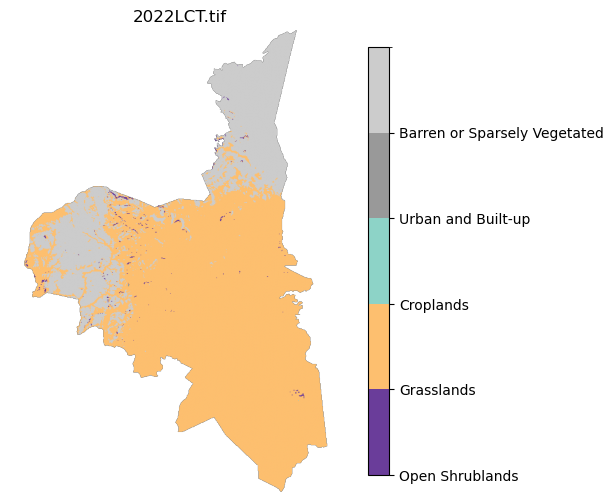

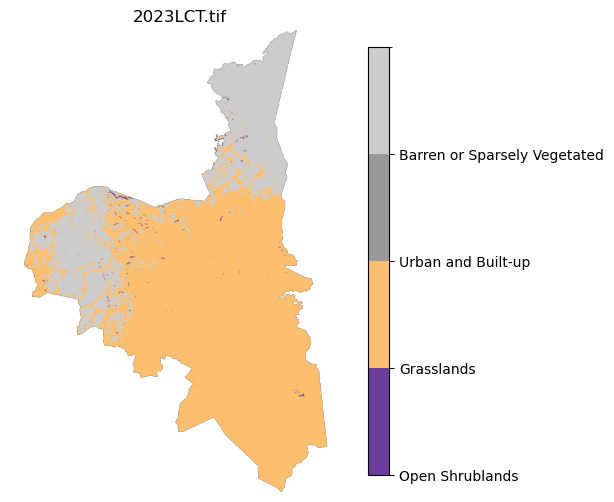

In [61]:
import glob
import os

data_folder = "Datasets_Hackathon/Modis_Land_Cover_Data"
tif_files = sorted(glob.glob(os.path.join(data_folder, "*.tif")))

for tif_path in tif_files:
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)

    used_codes = np.unique(data.compressed()) if np.ma.is_masked(data) else np.unique(data)
    used_codes = sorted(used_codes.tolist())

    colors_for_used = [class_colors[code] for code in used_codes]
    used_cmap = mcolors.ListedColormap(colors_for_used)
    used_norm = mcolors.BoundaryNorm(used_codes + [used_codes[-1] + 1], len(used_codes))

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(data, cmap=used_cmap, norm=used_norm)
    ax.set_title(os.path.basename(tif_path))
    ax.axis("off")

    cbar = plt.colorbar(im, ax=ax, ticks=used_codes, fraction=0.046, pad=0.04)
    cbar.ax.set_yticklabels([class_labels[code] for code in used_codes])

    plt.show()


All unique class codes: [7, 10, 12, 13, 16]


C:\Users\loren\AppData\Local\Temp\ipykernel_25808\2860764252.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", n_codes)  # Use cm.get_cmap from matplotlib.cm


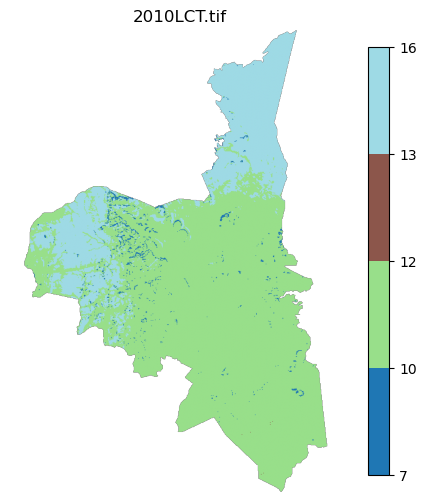

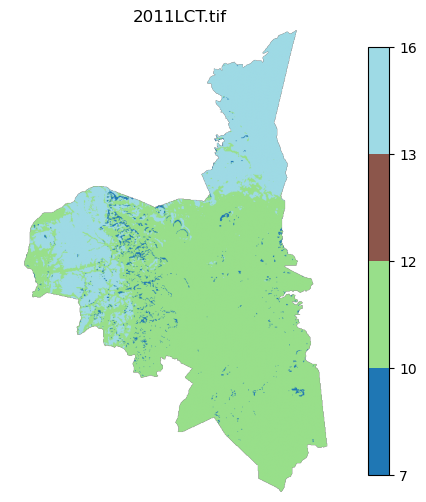

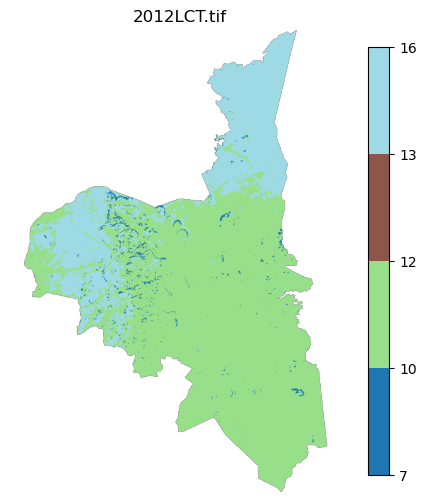

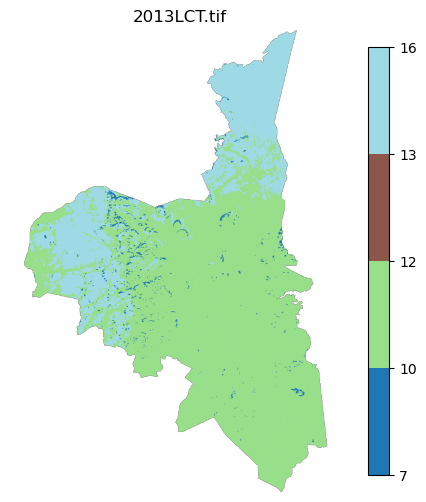

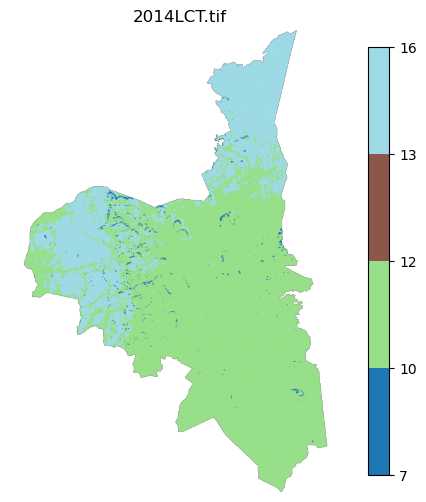

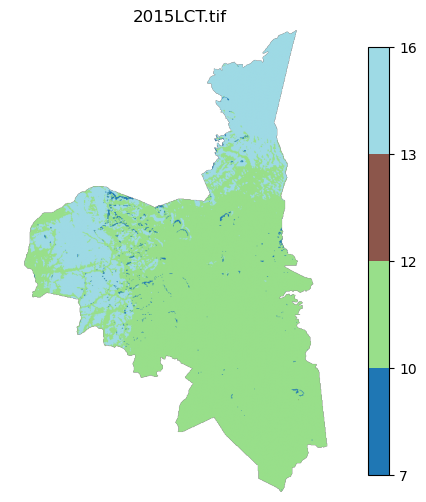

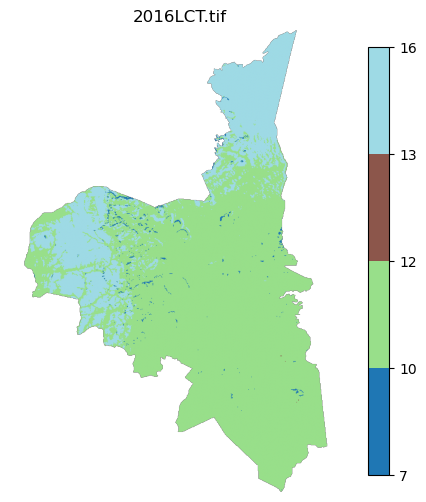

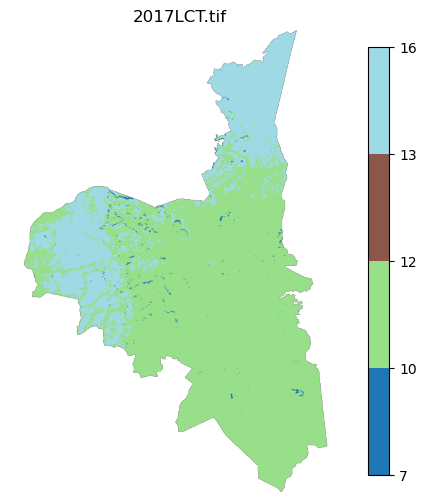

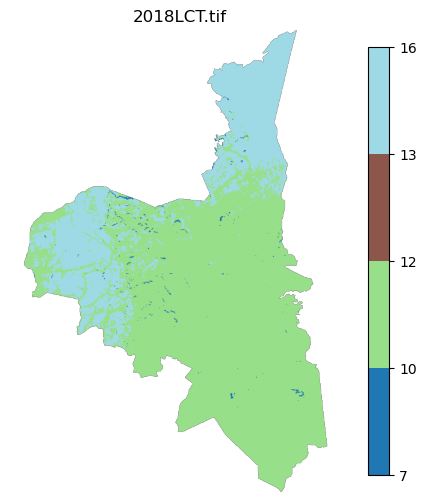

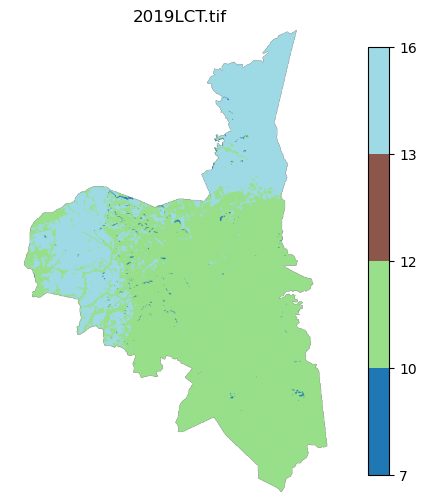

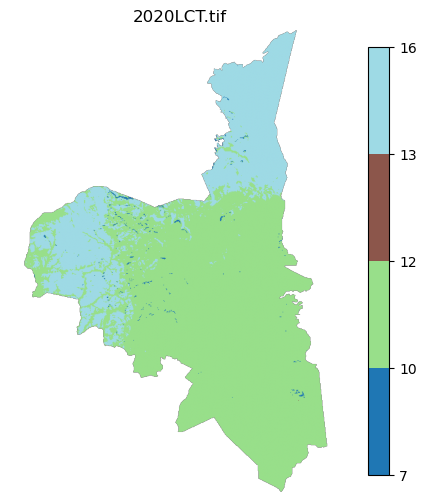

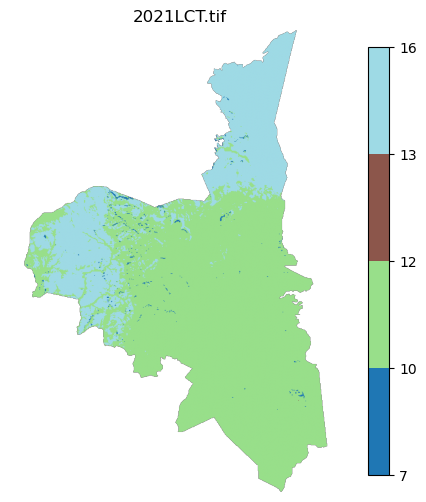

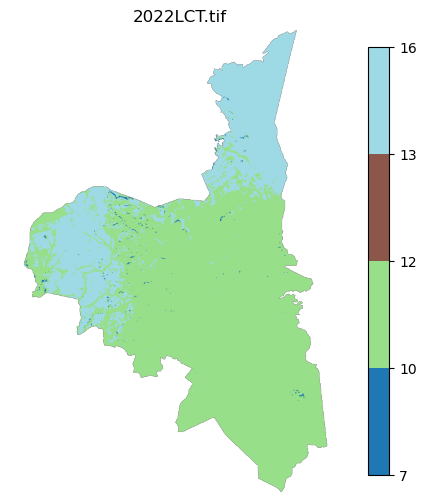

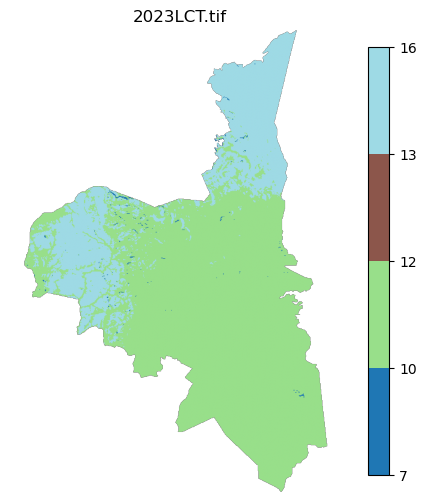

In [60]:
import os
import glob
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm  # Import cm for get_cmap

# 1) Gather all unique values across all files to ensure consistent color mapping
data_folder = "Datasets_Hackathon/Modis_Land_Cover_Data"
tif_files = sorted(glob.glob(os.path.join(data_folder, "*.tif")))

all_unique_vals = set()

for tif_path in tif_files:
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        # Mask nodata values if needed
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)
        unique_vals = np.unique(data)
        if np.ma.is_masked(unique_vals):
            unique_vals = unique_vals.compressed()
        all_unique_vals.update(unique_vals.tolist())

all_unique_vals = sorted(list(all_unique_vals))
print("All unique class codes:", all_unique_vals)

# 2) Create a discrete colormap that covers all possible codes
n_codes = len(all_unique_vals)
cmap = cm.get_cmap("tab20", n_codes)  # Use cm.get_cmap from matplotlib.cm
norm = colors.BoundaryNorm(all_unique_vals, cmap.N)

# 3) Plot each file in its own figure
for tif_path in tif_files:
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)

    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(data, cmap=cmap, norm=norm)
    ax.set_title(os.path.basename(tif_path))
    ax.axis("off")

    # Add a colorbar for this figure
    fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)

    plt.show()  # Displays each figure separately


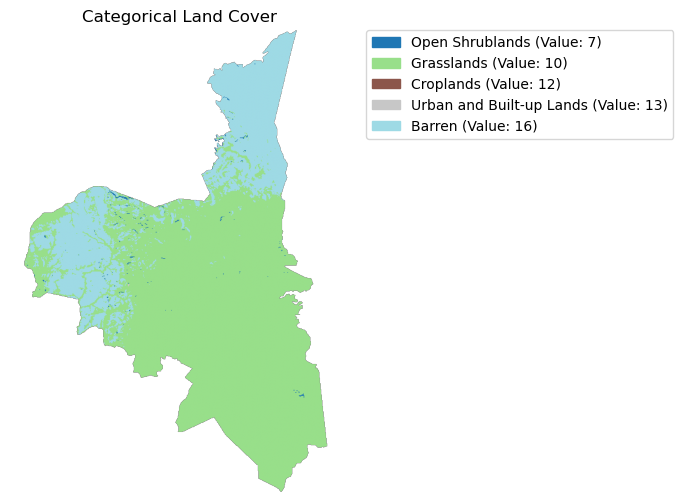

In [56]:
import matplotlib.patches as mpatches

# Define your mapping from class value to name (from your OrderedDict outputs)
legend_items = {
    7: "Open Shrublands",
    10: "Grasslands",
    12: "Croplands",
    13: "Urban and Built-up Lands",
    16: "Barren"
}

# Create a list of legend handles using the same colormap and normalizer you defined.
handles = []
for val, name in legend_items.items():
    color = cmap(norm(val))
    patch = mpatches.Patch(color=color, label=f"{name} (Value: {val})")
    handles.append(patch)

# Now, when plotting your figure, add the legend. For example, in a single-figure plot:
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(data, cmap=cmap, norm=norm)
ax.set_title("Categorical Land Cover")
ax.axis("off")

# Add the legend outside the plot area
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.show()


All unique class codes: [7, 10, 12, 13, 16]


C:\Users\loren\AppData\Local\Temp\ipykernel_25808\1054745064.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", n_codes)  # e.g., tab20, tab20b, hsv, etc.
C:\Users\loren\AppData\Local\Temp\ipykernel_25808\1054745064.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


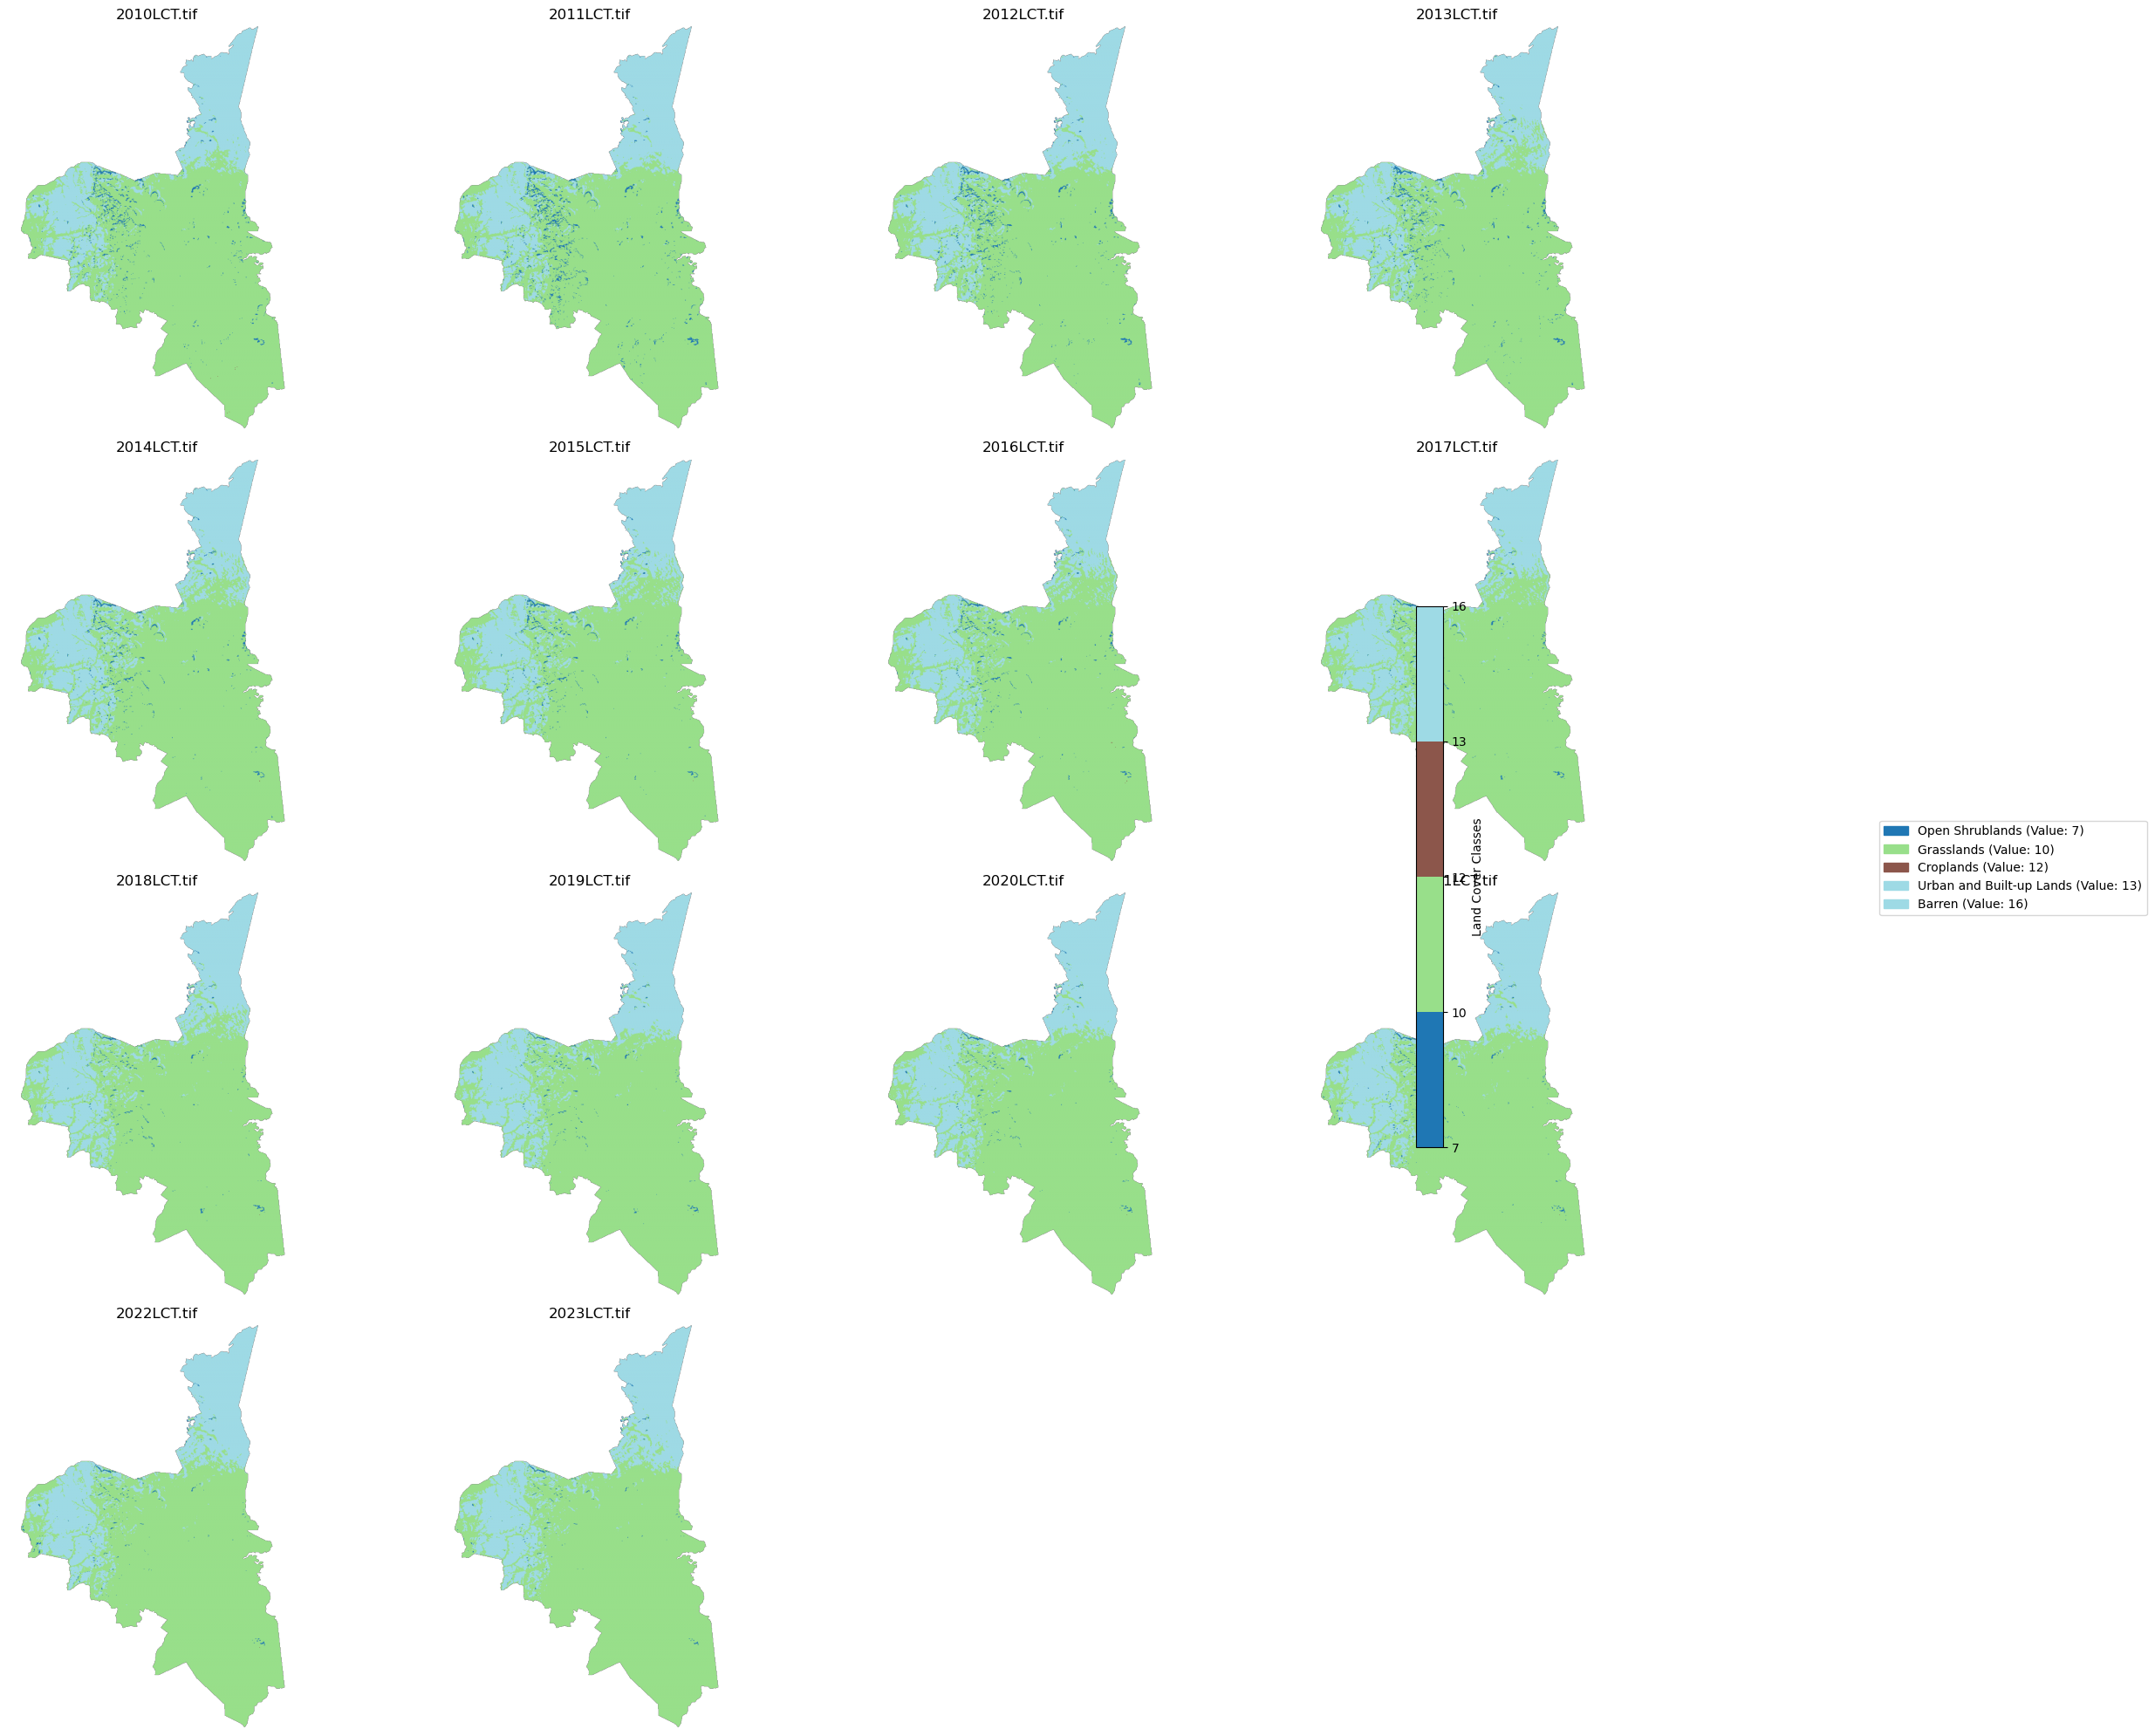

Plot saved as merged_land_cover_comparison.png


In [66]:
import os
import glob
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

# 1) Define your custom legend mapping from class values to names
legend_items = {
    7: "Open Shrublands",
    10: "Grasslands",
    12: "Croplands",
    13: "Urban and Built-up Lands",
    16: "Barren"
}

# 2) Gather all unique values across all files for a consistent colormap
data_folder = "Datasets_Hackathon/Modis_Land_Cover_Data"
tif_files = sorted(glob.glob(os.path.join(data_folder, "*.tif")))

all_unique_vals = set()
for tif_path in tif_files:
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        # Mask nodata values if needed
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)
        unique_vals = np.unique(data)
        if np.ma.is_masked(unique_vals):
            unique_vals = unique_vals.compressed()
        all_unique_vals.update(unique_vals.tolist())

all_unique_vals = sorted(list(all_unique_vals))
print("All unique class codes:", all_unique_vals)

# 3) Create a discrete colormap & normalizer
n_codes = len(all_unique_vals)
cmap = cm.get_cmap("tab20", n_codes)  # e.g., tab20, tab20b, hsv, etc.
norm = colors.BoundaryNorm(all_unique_vals, cmap.N)

# 4) Prepare a subplot grid for all TIFF files
n_files = len(tif_files)
cols = 4  # Adjust to fit your preference
rows = (n_files // cols) + (1 if n_files % cols != 0 else 0)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # Flatten to easily iterate even if it's a 2D array

# 5) Loop through each file, plot it in a subplot
for i, tif_path in enumerate(tif_files):
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)

    ax = axes[i]
    im = ax.imshow(data, cmap=cmap, norm=norm)
    ax.set_title(os.path.basename(tif_path))
    ax.axis("off")

# Hide any extra axes if the grid is bigger than the number of files
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# 6) Add a single colorbar for the entire figure
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.01)
cbar.set_label("Land Cover Classes")

# 7) Create legend handles from the custom legend mapping
handles = []
for val, name in legend_items.items():
    color = cmap(norm(val))
    patch = mpatches.Patch(color=color, label=f"{name} (Value: {val})")
    handles.append(patch)

# 8) Place the legend outside the main plot area
fig.legend(
    handles=handles,
    bbox_to_anchor=(1.15, 0.5),
    loc="center left",
    borderaxespad=0.
)

plt.tight_layout()

# 9) Save the entire figure as a PNG (optional DPI argument for resolution)
output_png = "merged_land_cover_comparison.png"
plt.savefig(output_png, dpi=300, bbox_inches="tight")
plt.show()

print(f"Plot saved as {output_png}")


In [57]:
import os
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt

folder = "Datasets_Hackathon/MODIS_Gross_Primary_Production_GPP"
tif_files = sorted(glob.glob(os.path.join(folder, "*.tif")))

global_min = float("inf")
global_max = float("-inf")

# Scan all TIFs to find overall min/max
for tif_path in tif_files:
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        # If needed, mask nodata values
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)
        current_min = data.min()
        current_max = data.max()
        if current_min < global_min:
            global_min = current_min
        if current_max > global_max:
            global_max = current_max

print(f"Global min across all files: {global_min}")
print(f"Global max across all files: {global_max}")


Global min across all files: 171
Global max across all files: 65533


C:\Users\loren\AppData\Local\Temp\ipykernel_25808\3060276406.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


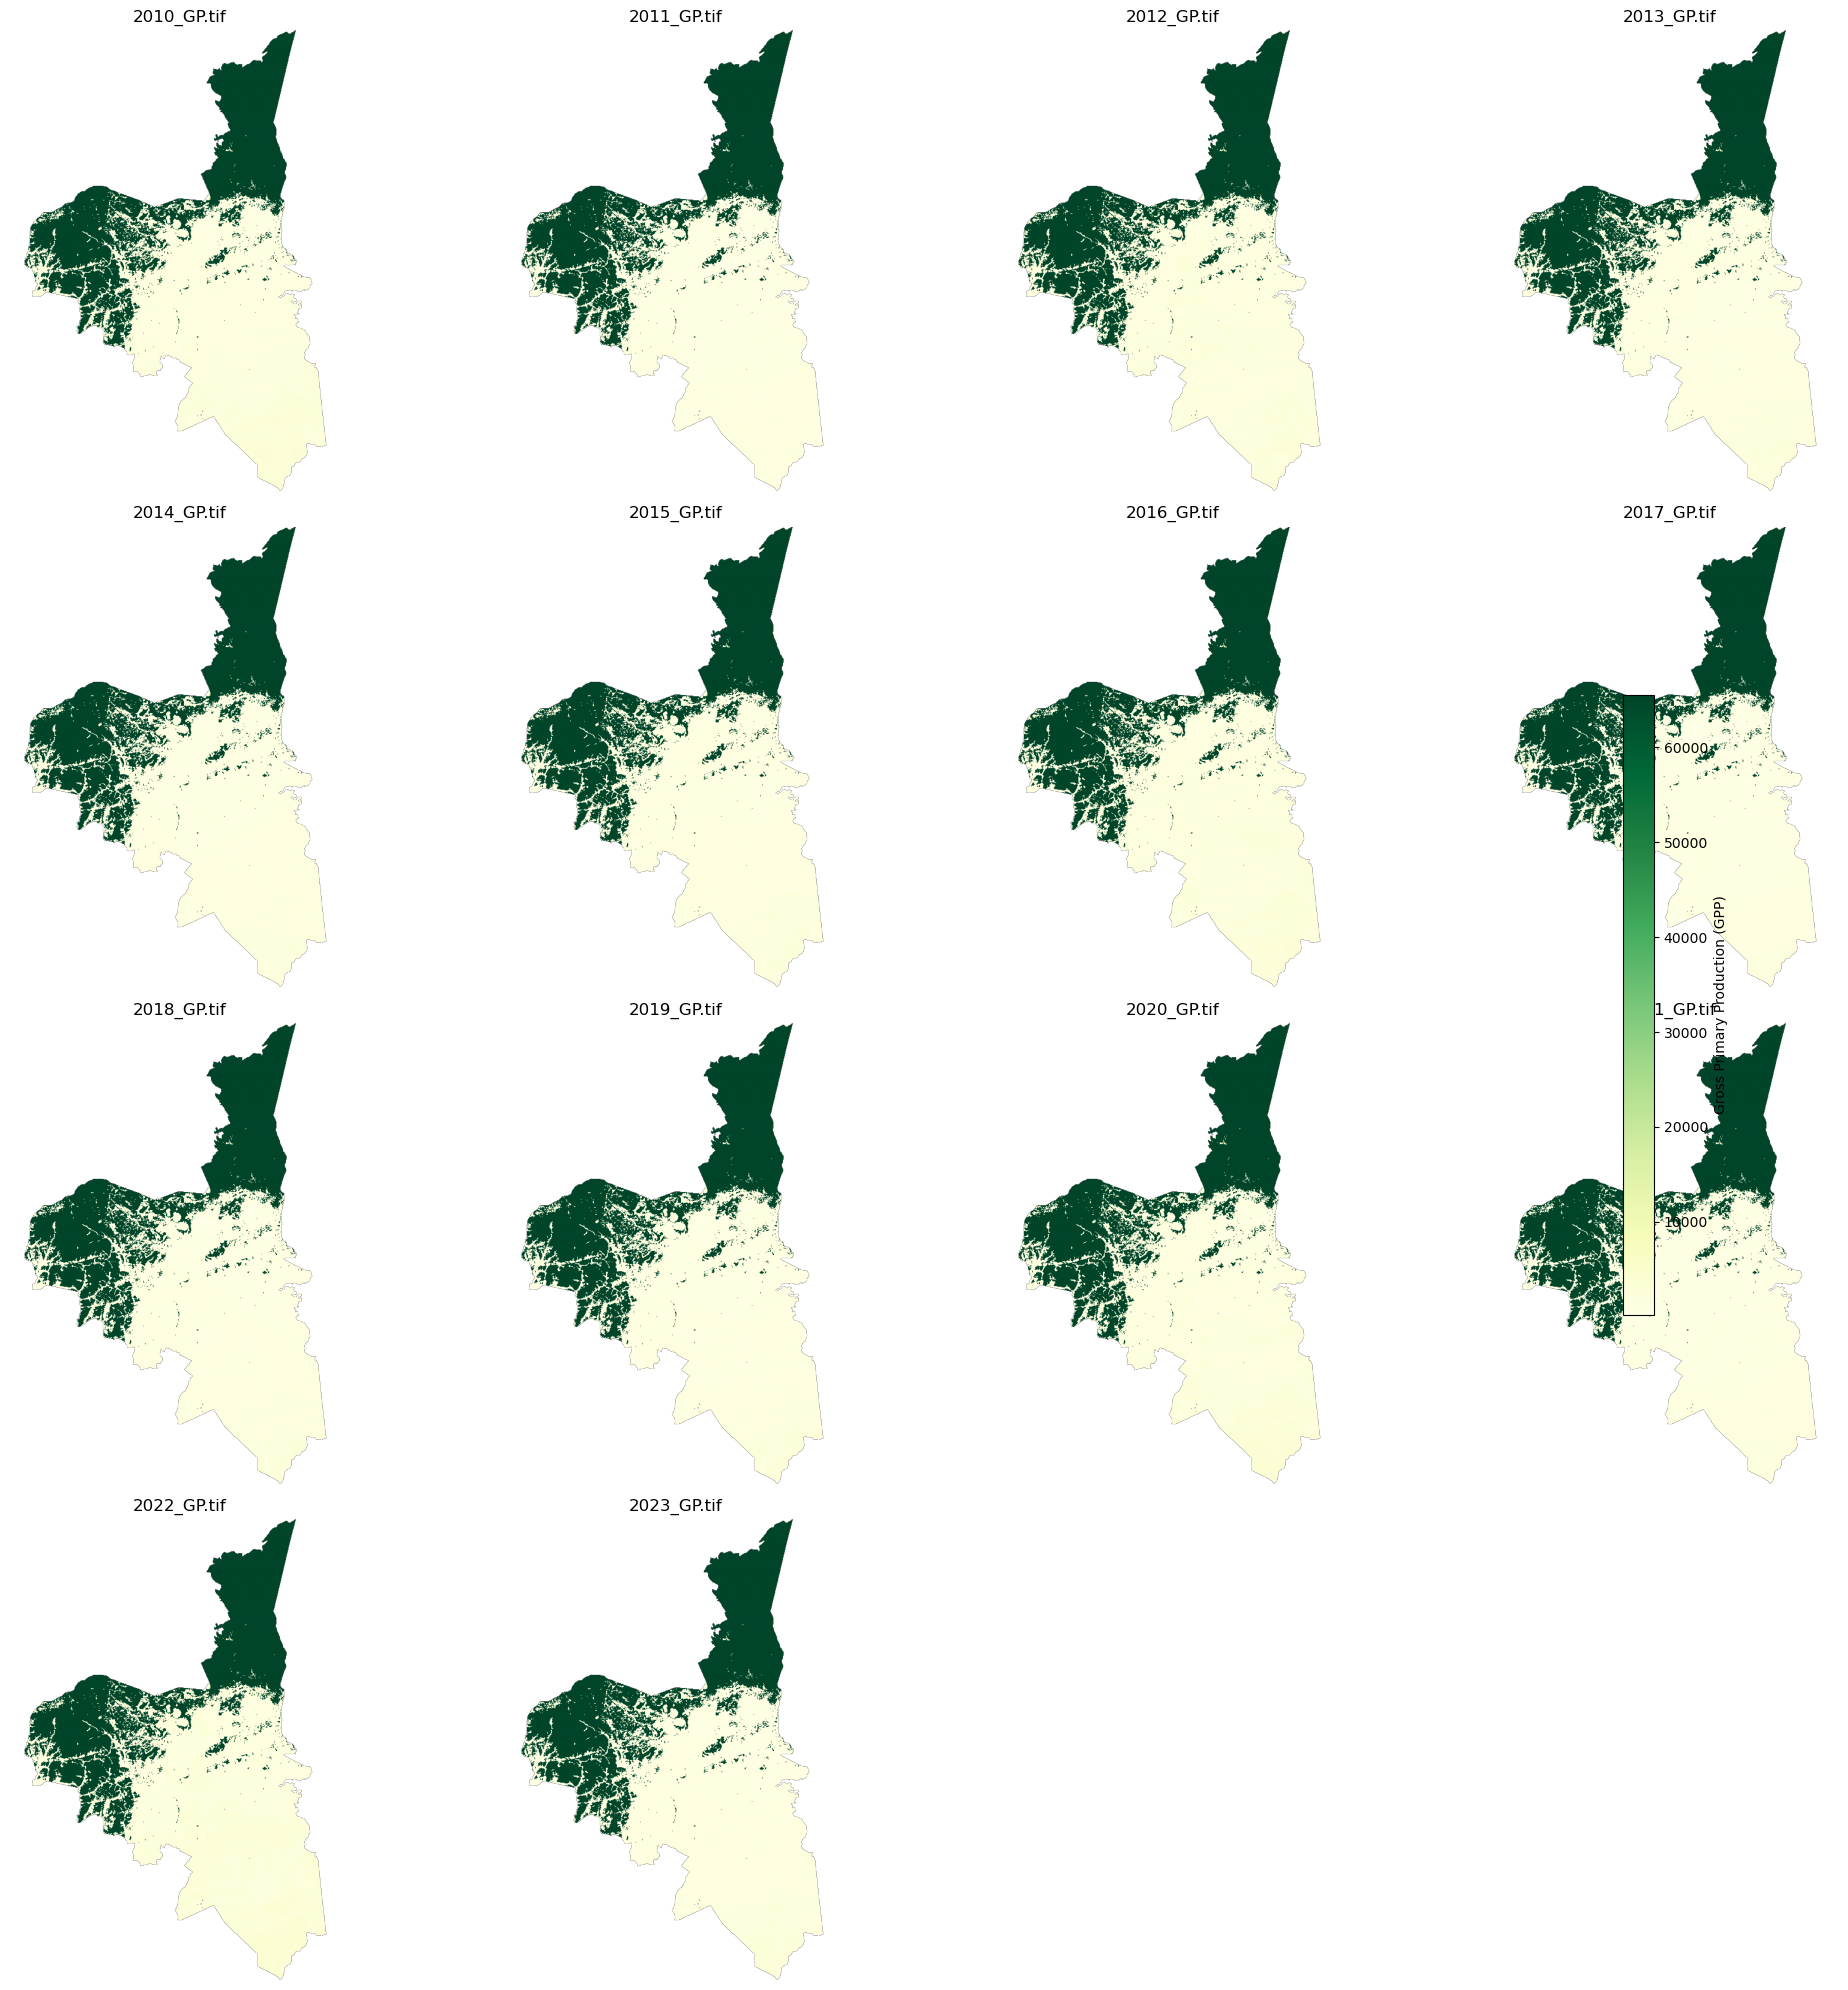

In [58]:
# Decide on how many columns you want (e.g., 4)
cols = 4
n_files = len(tif_files)
rows = n_files // cols + (1 if n_files % cols != 0 else 0)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # Flatten in case it's a 2D array of Axes

for i, tif_path in enumerate(tif_files):
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        # Mask nodata if applicable
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)

    ax = axes[i]
    # Use a continuous colormap for GPP
    im = ax.imshow(data, cmap="YlGn", vmin=global_min, vmax=global_max)
    ax.set_title(os.path.basename(tif_path))
    ax.axis("off")

# Hide any unused subplots (if the grid is bigger than the number of files)
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Add one colorbar for the entire figure
cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.01)
cbar.set_label("Gross Primary Production (GPP)")

plt.tight_layout()
plt.show()


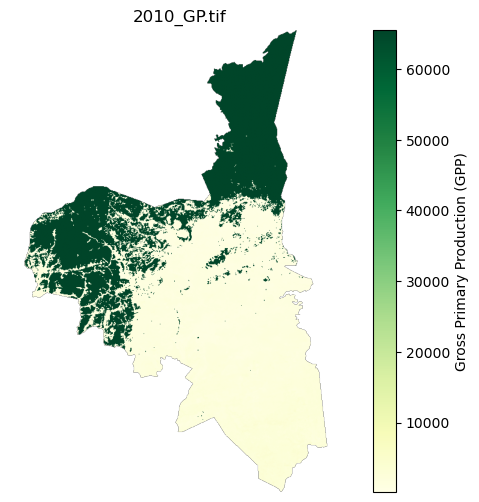

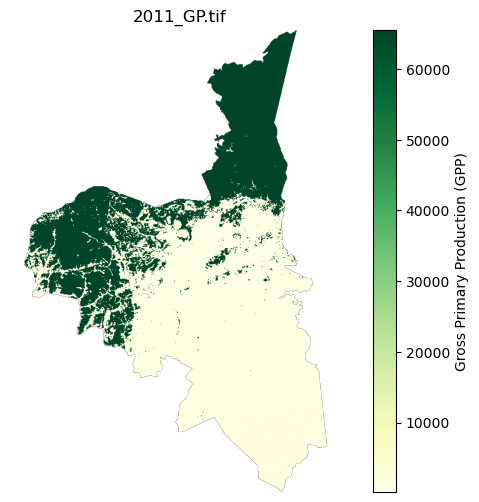

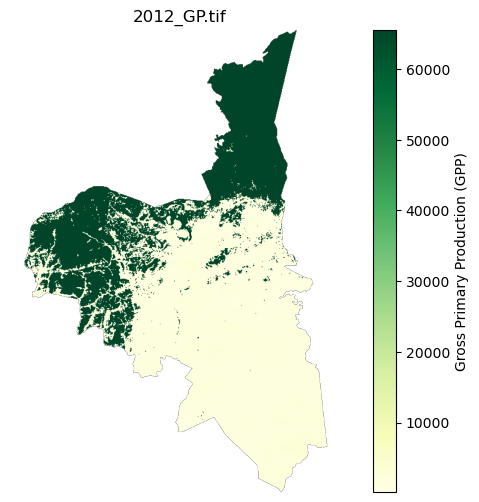

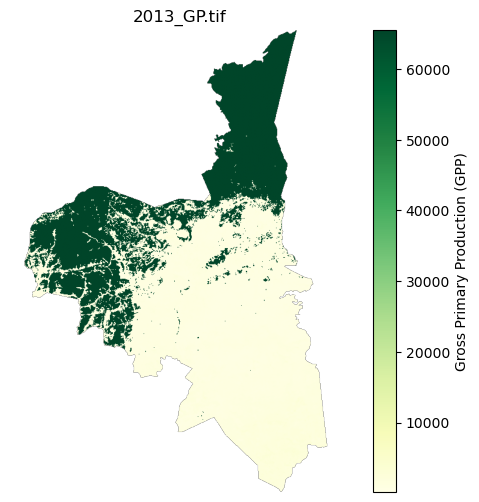

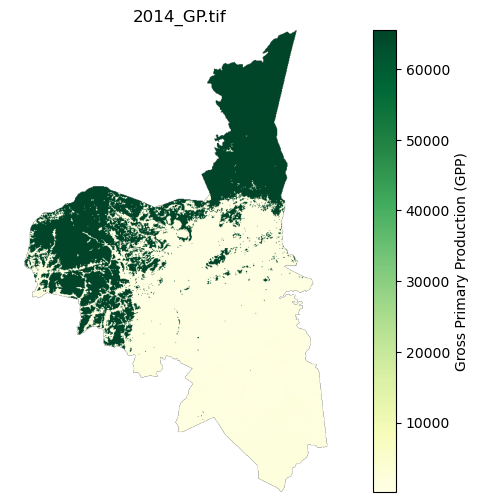

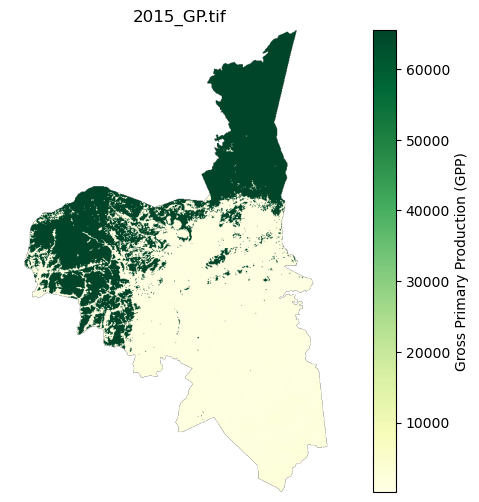

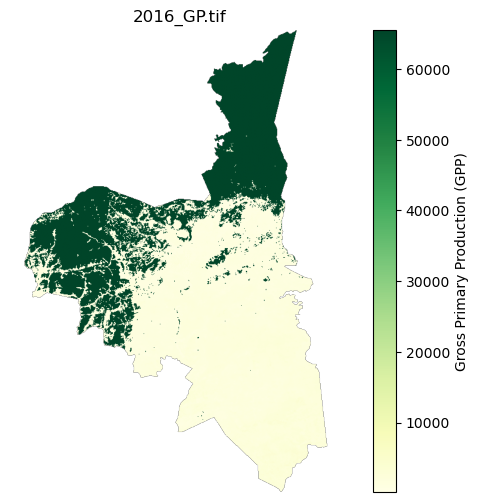

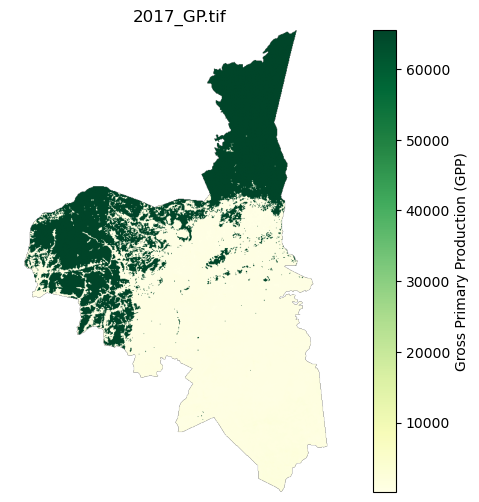

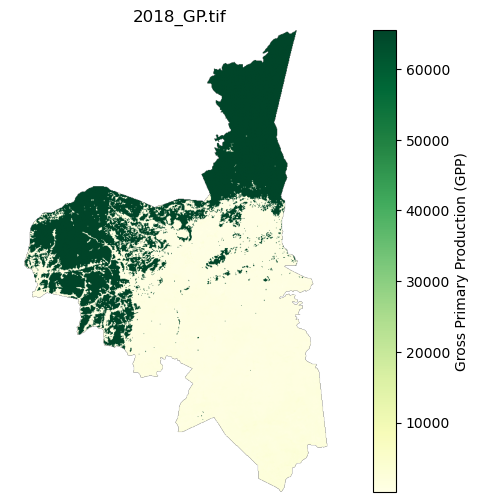

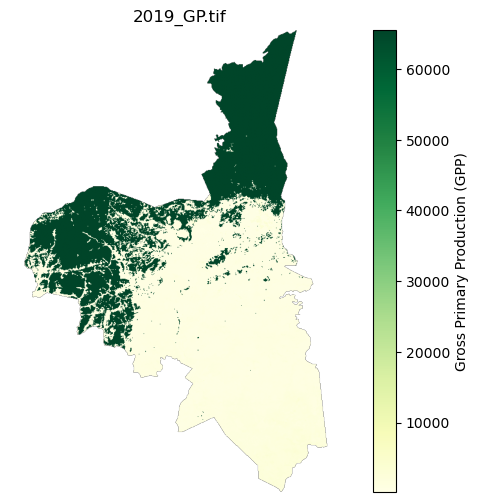

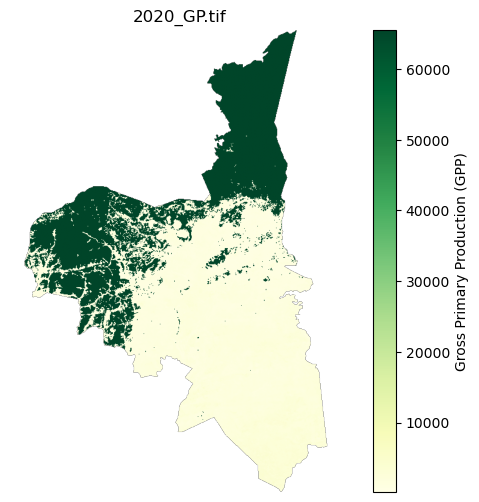

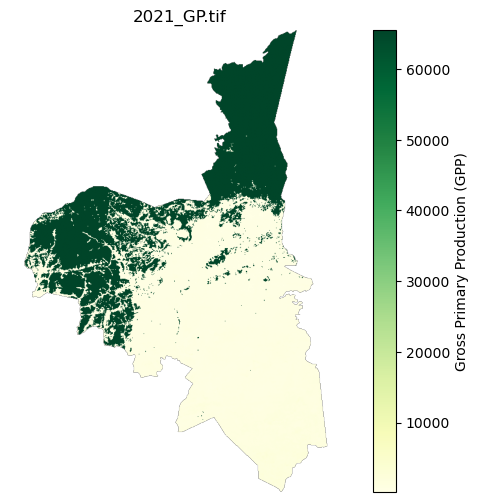

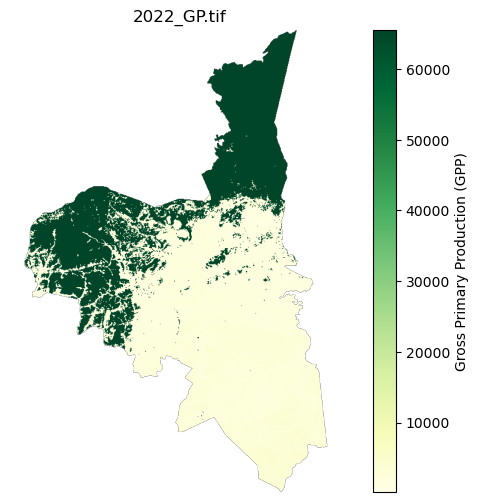

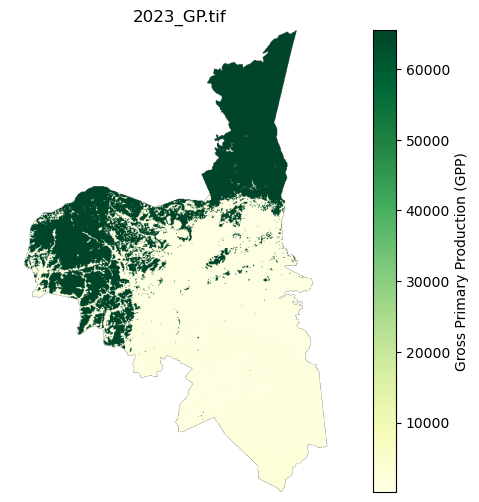

In [59]:
for tif_path in tif_files:
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        if src.nodata is not None:
            data = np.ma.masked_equal(data, src.nodata)

    plt.figure(figsize=(6, 6))
    plt.imshow(data, cmap="YlGn", vmin=global_min, vmax=global_max)
    plt.title(os.path.basename(tif_path))
    plt.axis("off")
    cbar = plt.colorbar()
    cbar.set_label("Gross Primary Production (GPP)")
    plt.show()
